In [33]:
%matplotlib inline
import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

# 3 Gaussians: 
- $N([-2, 0], diag(0.3))$
- $N([4, 5], diag(0.5))$
- $N([3, 2], diag(0.8))$

(-10, 10)

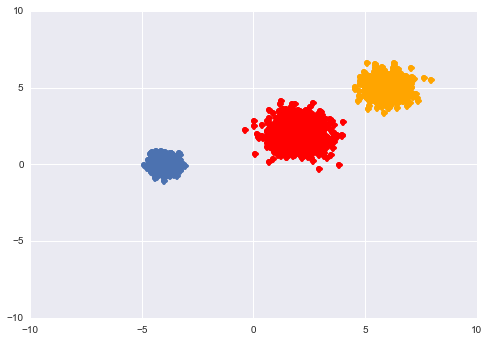

In [34]:
n=1000

blue_train = 0.3*np.random.randn(n,2) + np.array([-4,0])
plt.plot(blue_train[:,0], blue_train[:,1], 'o', color='b')

orange_train = 0.5*np.random.randn(n,2) + np.array([6,5])
plt.plot(orange_train[:,0], orange_train[:,1], 'o', color='orange')

red_train = 0.7*np.random.randn(n,2) + np.array([2,2])
plt.plot(red_train[:,0], red_train[:,1], 'o', color='red')

plt.xlim([-10,10])
plt.ylim([-10,10])

We assume that we know there are 3 clusters, but the assignment of data points to clusters is not known to us:

(-10, 10)

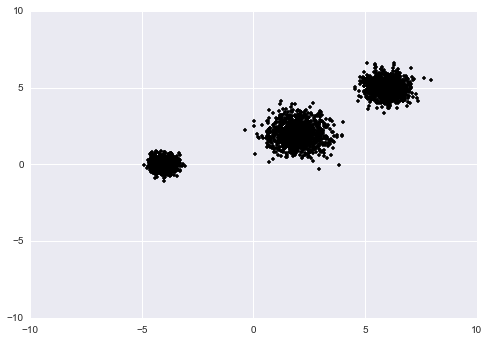

In [35]:
x_train = np.vstack((blue_train, orange_train, red_train))

plt.plot(x_train[:,0], x_train[:,1], '.', color='black')
plt.xlim([-10,10])
plt.ylim([-10,10])

We need to learn the following parameters:
- 3 Gaussian parameters pairs: $(\mu_1, \Sigma_1), (\mu_2, \Sigma_2), (\mu_3, \Sigma_3)$
- the mixture probabilities $(\pi_1, \pi_2, \pi_3)$

We initialize them as:
$\mu_i = 0 , \Sigma_i = I$ and $\pi_i = 1/3$ for $i=1,2,3$
    

In [75]:
mus = [np.zeros((2)), np.ones((2)), np.random.rand((2))]
sigmas = [np.eye(2,2), np.eye(2,2), np.eye(2,2)]
pi = [1/3.0, 1/3.0, 1/3.0]

#E step

In [76]:
N = x_train.shape[0]
K = 3
x = x_train

In [77]:
R = np.zeros((N, K))
for i in range(N):
    for k in range(K):
        x = x_train[i,:]
        R[i,k] = pi[k] * scipy.stats.multivariate_normal.pdf(x, mus[k], sigmas[k])
        #get normalizaing value
        normalizer = 0.0
        for j in range(K):
            normalizer += pi[j] * scipy.stats.multivariate_normal.pdf(x, mus[j], sigmas[j])
        R[i,k] = R[i,k] / normalizer
    

#M step

In [78]:
print(R.shape)
print(x_train.shape)

(3000, 3)
(3000, 2)


In [106]:
r = np.zeros((K,))

for k in range(K):
    r[k] = np.sum(R[:, k])

# Find new pi that maximizes Q
for k in range(K):
    pi[k] = r[k] / N
    
# Find new mus and sigmas that maximize Q
for k in range(K):
    m1 = np.sum(R[:, k] * x_train[:, 0]) / r[k]
    m2 = np.sum(R[:, k] * x_train[:, 1]) / r[k]
    mus[k] = np.array([m1, m2])
    
    sum = 0.0
    for i in range(N):
        sum += R[i,k] * np.dot(x_train[i,:] - mus[k], (x_train[i,:] - mus[k]).T)
    
    sig = sum / r[k] - mus[k]
        
    sig = np.sum(R[:,k] * np.dot(x_train, x_train.T)) / r[k] - np.dot(mus[k], mus[k].T)
    #sig1 = np.sum(R[:,k] * (np.dot((x_train - mus[k]) , (x_train - mus[k]).T))) / r[k]
    print(sig)
print(mus)

-14079.9157893
43111.8808652
2151.63429054
[array([-3.65495892,  0.0743738 ]), array([ 4.30093797,  3.72054257]), array([-1.19461552,  0.99118624])]
